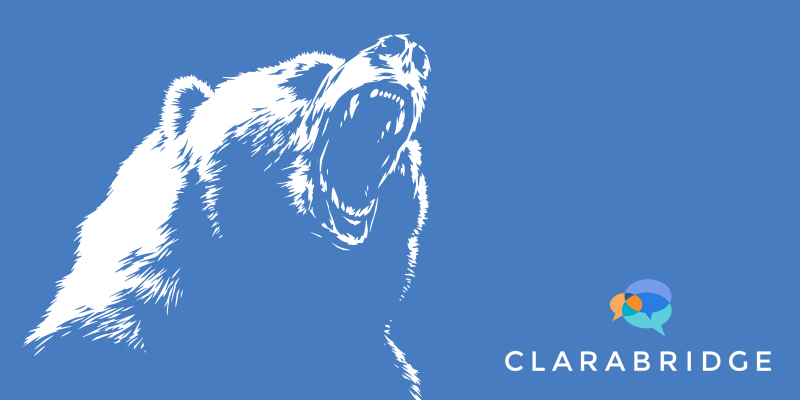

In [97]:
from IPython.display import Image, display
display(Image('/Users/dheepan.ramanan/Documents/OscarsData/Screenshots/oscarspredictionfeatureimage.jpg'))

# Aims of Project

* I wanted to build a statistical model to predict the Oscars Best Picture.
* Clarabridge topics and sentiment paired with IMDB statistics will be used as the statistical features


## Data Gathering

* First step in the process is writing a custom web scraping script
* I frequently use [Requests]('http://docs.python-requests.org/en/master/') + [BeautifulSoup]('https://www.crummy.com/software/BeautifulSoup/') to do quick web crawling + html parsing
* In this case I wanted to gather text reviews from IMDB, their associated stats, and Critic and Audience Score from RottenTomatoes
* Luckily IMDB provides us with a list of movies nominated for Best Picture every year.
* We can use this list as the starting point for our crawling

In [1]:
from IPython.display import Image, display

## Lots of right-click inspect element! 

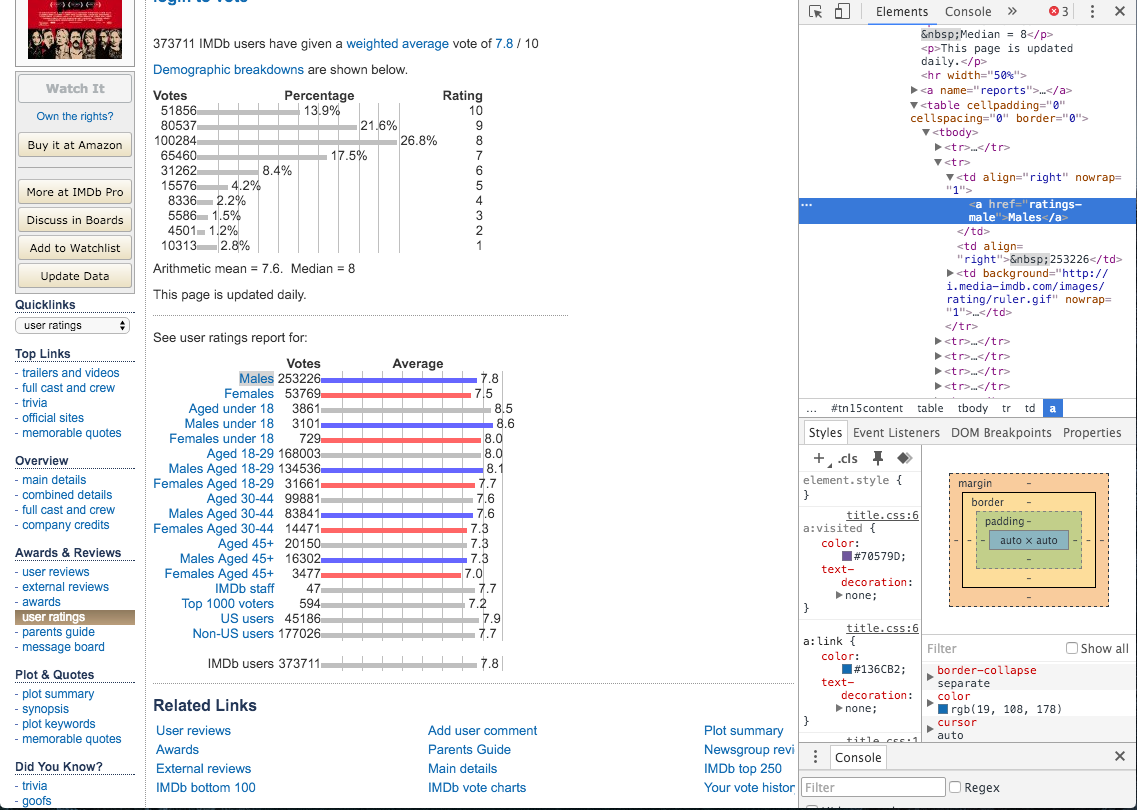

In [8]:
display(Image('/Users/dheepan.ramanan/Documents/OscarsData/Screenshots/capture1.png'))

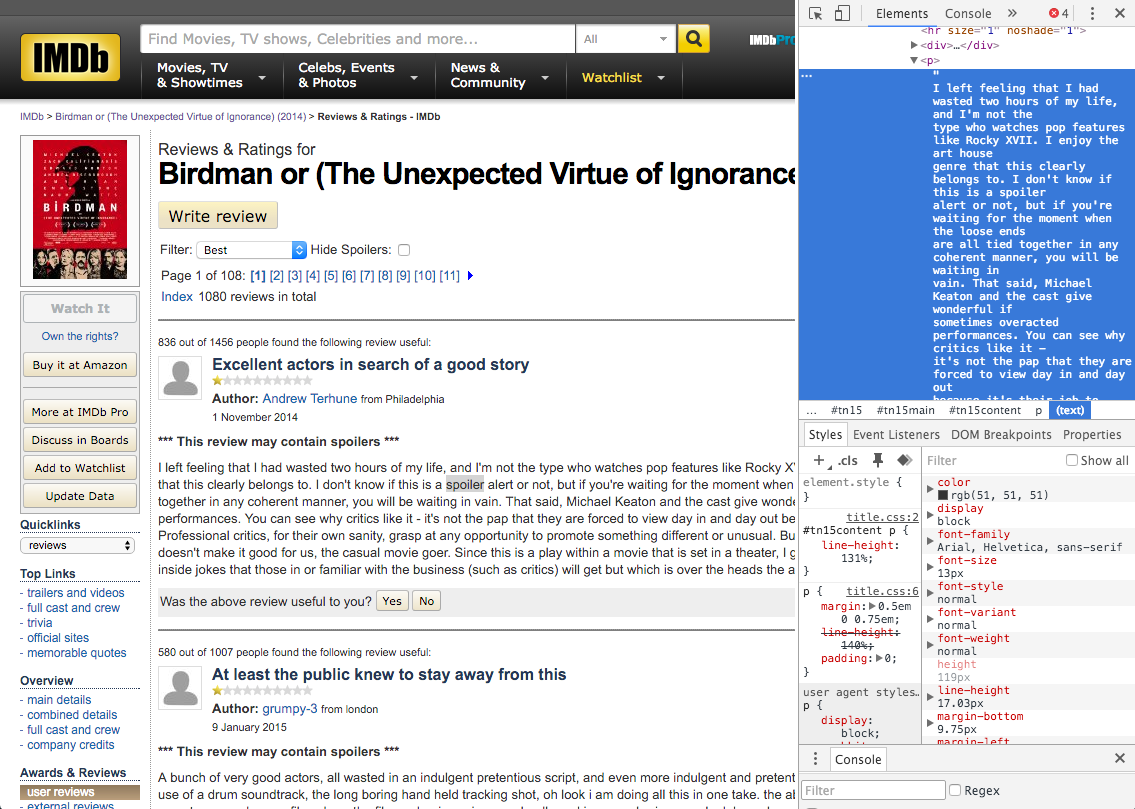

In [9]:
display(Image('/Users/dheepan.ramanan/Documents/OscarsData/Screenshots/capture2.png'))

**In total I gathered 134,014 reviews**
* To fit models and perform data analysis I use the fabulous [Pandas]('http://pandas.pydata.org/) library, which is built on top of [SciPy]('https://www.scipy.org/') and [NumPy]('http://www.numpy.org/')

In [13]:
import pandas as pd
OscarsData = pd.read_excel('DataFiles/dropboxoscars.xlsx')

In [14]:
OscarsData.shape

(134014, 42)

In total we have 42 features. Every row represents a unqiue review. 

In [15]:
OscarsData.head(10)

index  year       movietitle releasedate  boxoffice    director  \
0      0  2000  American Beauty  1999-10-01  130058047  Sam Mendes   
1      1  2000  American Beauty  1999-10-01  130058047  Sam Mendes   
2      2  2000  American Beauty  1999-10-01  130058047  Sam Mendes   
3      3  2000  American Beauty  1999-10-01  130058047  Sam Mendes   
4      4  2000  American Beauty  1999-10-01  130058047  Sam Mendes   
5      5  2000  American Beauty  1999-10-01  130058047  Sam Mendes   
6      6  2000  American Beauty  1999-10-01  130058047  Sam Mendes   
7      7  2000  American Beauty  1999-10-01  130058047  Sam Mendes   
8      8  2000  American Beauty  1999-10-01  130058047  Sam Mendes   
9      9  2000  American Beauty  1999-10-01  130058047  Sam Mendes   

   directorage directorgender  winner  reviewagg     ...        nps  \
0           35           male  winner        8.4     ...       42.3   
1           35           male  winner        8.4     ...       42.3   
2           35           male  winner        8.4     ...       42.3   
3           35           male  winner        8.4     ...       42.3   
4           35           male  winner        8.4     ...       42.3   
5           35           male  winner        8.4     ...       42.3   
6           35           male  winner        8.4     ...       42.3   
7           35           male  winner        8.4     ...       42.3   
8           35           male  winner        8.4     ...       42.3   
9           35           male  winner        8.4     ...       42.3   

   releasemonth  releaseyear  malepercent  femalepercent  under18percent  \
0            10         1999    79.008754      20.991246        0.707269   
1            10         1999    79.008754      20.991246        0.707269   
2            10         1999    79.008754      20.991246        0.707269   
3            10         1999    79.008754      20.991246        0.707269   
4            10         1999    79.008754      20.991246        0.707269   
5            10         1999    79.008754      20.991246        0.707269   
6            10         1999    79.008754      20.991246        0.707269   
7            10         1999    79.008754      20.991246        0.707269   
8            10         1999    79.008754      20.991246        0.707269   
9            10         1999    79.008754      20.991246        0.707269   

   thirtyto44percent  over44percent  source  criticdelta  
0          51.954252      47.338479    IMDB           -5  
1          51.954252      47.338479    IMDB           -5  
2          51.954252      47.338479    IMDB           -5  
3          51.954252      47.338479    IMDB           -5  
4          51.954252      47.338479    IMDB           -5  
5          51.954252      47.338479    IMDB           -5  
6          51.954252      47.338479    IMDB           -5  
7          51.954252      47.338479    IMDB           -5  
8          51.954252      47.338479    IMDB           -5  
9          51.954252      47.338479    IMDB           -5  

[10 rows x 42 columns]

* At this point I loaded the data into Clarabridge & began topic modeling
* In total I created 50 categories 

## Say Hello To Dexter!

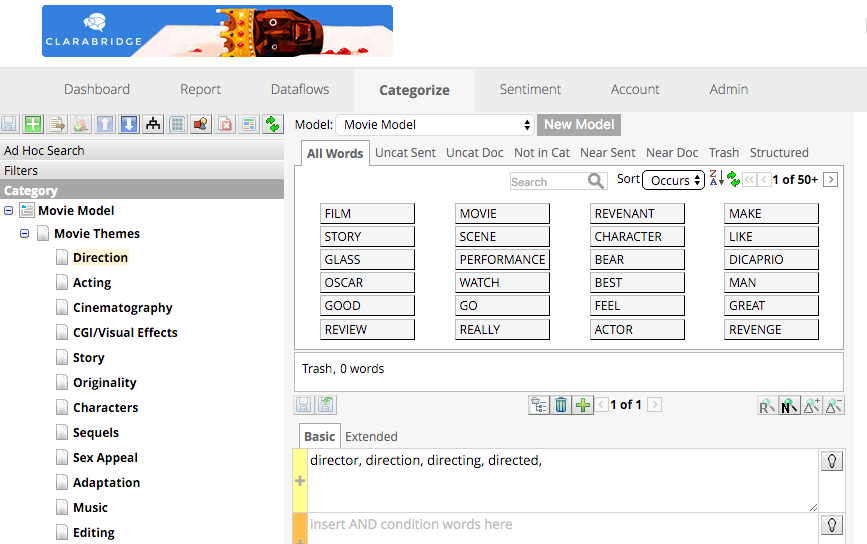

In [16]:
display(Image('/Users/dheepan.ramanan/Documents/OscarsData/Screenshots/capture3.png'))

## Initial Findings
* As part of the exploratory data-analysis I wrote a blog post analyzing the data in aggregate
* Since my final task is a statistical classification problem (what comprises an Oscars' Best Picture Film versus a nominee) I focused my data on finding differences between these two groups
* I took some of the data and visualized it using D3 interactive graphs
* Sample insight
>Data scraped from IMDB illustrates that a heavy genre bias prevails when it comes to both the types of films that are nominated and the average scores they accumulate. According to the results of the study, 90% of nominated films fall into the Drama category. The second most prevalent genre is the Biopic (biography), which claims 26% of nominees. Comparatively, Sports, Family movies, Musicals, Animation films, and Westerns rarely receive a nod from the academy awards. Moreover, a wide genre gap exists in regards to the base amount of gross theater revenues: to receive an Oscar nomination in a less traditional genre (such as Action), a given film must average close to $290 million at the US Box Office."

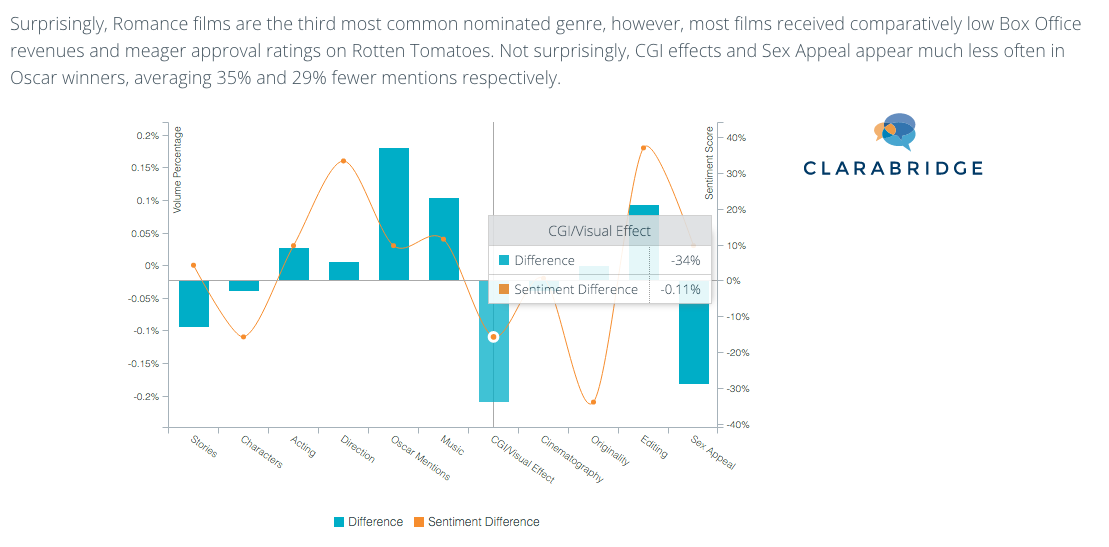

In [35]:
#Example visualization
display(Image('/Users/dheepan.ramanan/Documents/OscarsData/Screenshots/capture4.png'))

* Link to [full blog post]('http://www.clarabridge.com/sentiment-spotlight-gender-and-culture-in-the-oscars')
* [Seaborn]('https://stanford.edu/~mwaskom/software/seaborn/') and [matplotlib]('http://matplotlib.org/') are also great visualization tools for statistical analysis

In [44]:
import seaborn as sns
OscarsData.groupby('movietitle').mean()['nps'].head(5) #first 5
#for example let's look at the distribution of NPS scores across Oscars Movies

movietitle
12 Years a Slave    31.1
127 Hours            9.9
A Beautiful Mind    36.9
A Serious Man      -13.6
American Beauty     42.3
Name: nps, dtype: float64

18.099999999999124

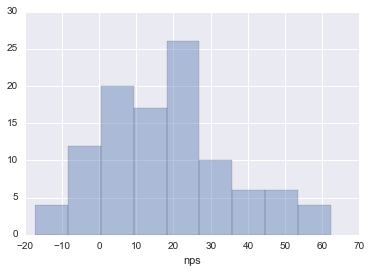

In [59]:
%matplotlib inline
sns.distplot(OscarsData.groupby('movietitle').mean()['nps'],kde=False)
OscarsData.groupby('movietitle').mean()['nps'].median()

In [58]:
OscarsData.loc[OscarsData['winner']=='winner']['nps'].median()

31.1

* For example, here we see the distribution of NPS scores in IMDB 
* Oscar winners average a score of 31.1 versus 18 for nominees 

## Data Transformation
* We are going to use [Scikit-Learn]('http://scikit-learn.org/stable/') to fit a statistical model on our data
* To get to that point we need to tranform our data to fit the model
* Part of that requires us to pair our IMDB data with Theme data in Clarabridge
* In order to accomplish this in a speedy manner we will use the reports API 

In [68]:
OscarsGrouped = OscarsData.groupby('movietitle').mean() #group by movietitle name and average non-unique statistics
OscarsGrouped.head(5)

index  year  boxoffice  directorage  reviewagg  \
movietitle                                                          
12 Years a Slave   474.5  2014   56667870           45        8.1   
127 Hours         1185.0  2011   18335230           55        7.6   
A Beautiful Mind   737.0  2002  170708996           48        8.2   
A Serious Man     1468.5  2010    9042780           53        7.0   
American Beauty   1651.5  2000  130058047           35        8.4   

                  criticscore  audiencescore  totalfloat  maleper  femaleper  \
movietitle                                                                     
12 Years a Slave           96             90      388359   256841      66596   
127 Hours                  93             85      262273   193147      40205   
A Beautiful Mind           75             93      557026   367628      92554   
A Serious Man              89             67       95831    74163      10763   
American Beauty            88             93      766470   496476     131905   

                     ...       passives   nps  releasemonth  releaseyear  \
movietitle           ...                                                   
12 Years a Slave     ...           48.1  31.1            10         2013   
127 Hours            ...           58.7   9.9            11         2010   
A Beautiful Mind     ...           47.0  36.9            12         2001   
A Serious Man        ...           49.0 -13.6            10         2009   
American Beauty      ...           37.1  42.3            10         1999   

                  malepercent  femalepercent  under18percent  \
movietitle                                                     
12 Years a Slave    79.409901      20.590099        1.927519   
127 Hours           82.770664      17.229336        1.017025   
A Beautiful Mind    79.887523      20.112477        0.799882   
A Serious Man       87.326614      12.673386        0.349213   
American Beauty     79.008754      20.991246        0.707269   

                  thirtyto44percent  over44percent  criticdelta  
movietitle                                                       
12 Years a Slave          64.530073      33.542408            6  
127 Hours                 64.515685      34.467290            8  
A Beautiful Mind          60.019961      39.180158          -18  
A Serious Man             51.041708      48.609080           22  
American Beauty           51.954252      47.338479           -5  

[5 rows x 35 columns]

In [67]:
OscarsGrouped.index

Index([u'12 Years a Slave', u'127 Hours', u'A Beautiful Mind',
       u'A Serious Man', u'American Beauty', u'American Hustle',
       u'American Sniper', u'Amour', u'An Education', u'Argo',
       ...
       u'There Will Be Blood', u'Toy Story 3', u'Traffic', u'True Grit', u'Up',
       u'Up in the Air', u'War Horse', u'Whiplash', u'Winter's Bone',
       u'Zero Dark Thirty'],
      dtype='object', name=u'movietitle', length=105)

* There are 105 films in our dataframe
* We need to append our Clarabridge topics data to each of these films
* Doing this manually would require a leaf report and export with the movie title as the filter x 105 movie titles

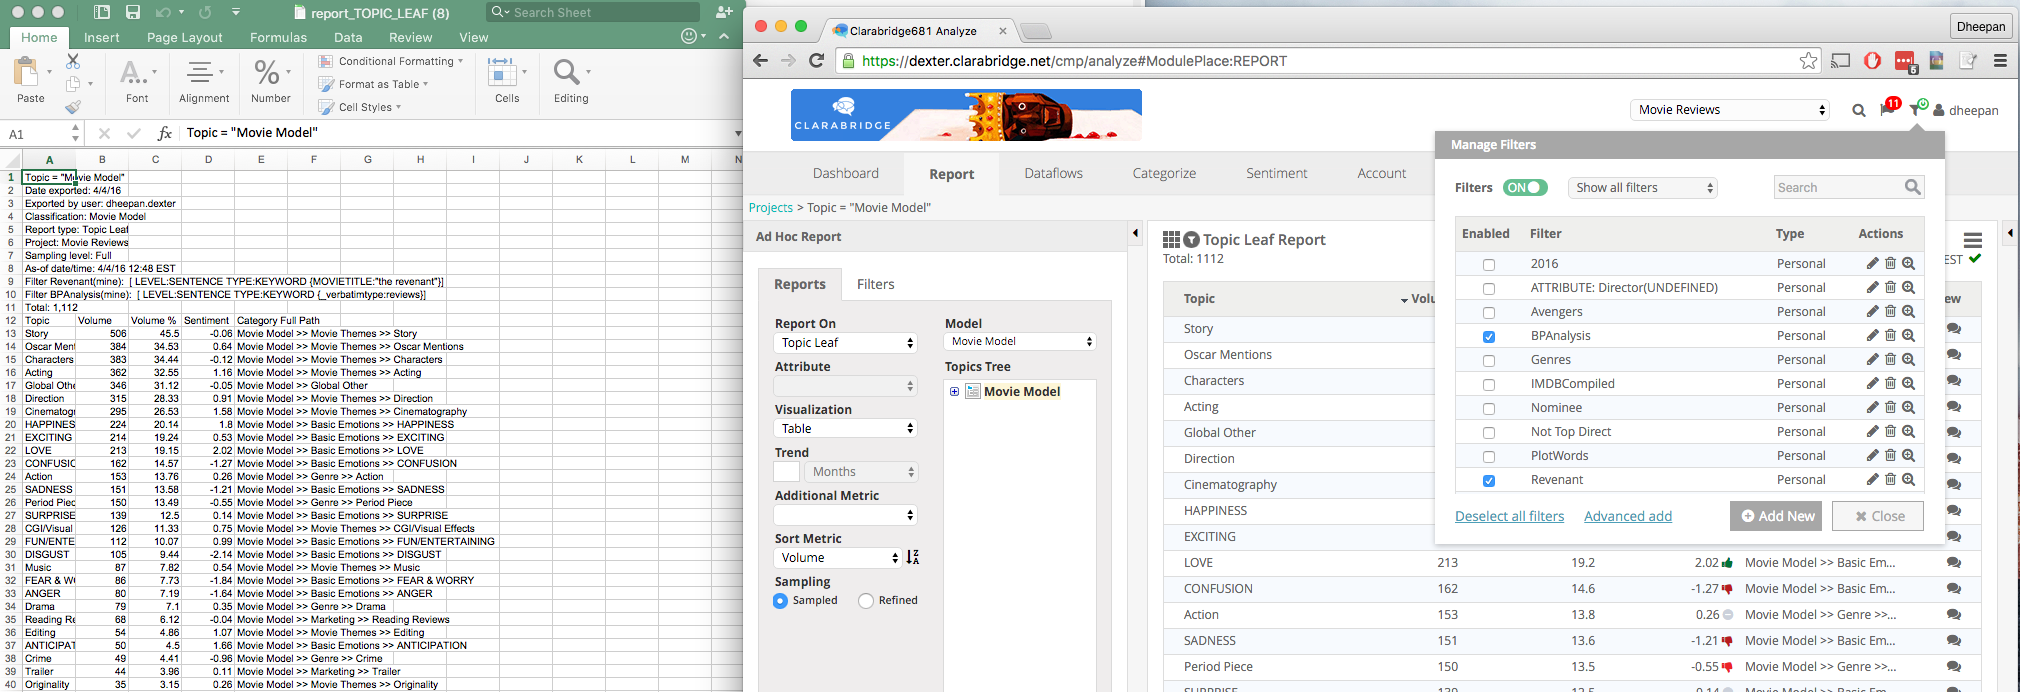

In [69]:
#example Clarabridge workflow
display(Image('/Users/dheepan.ramanan/Documents/OscarsData/Screenshots/capture5.png'))

* Using requests and looping through our filters we can automate this process
* See below for example API post request

In [70]:
import pandas as pd
import requests as rq
import json

headers = {'content-type': 'application/json'}
url = 'https://dexter.clarabridge.net/cbrestfulapi/v1/report'
authDexter = ("username","password")
frames= []

def themeApiCalls(url, authDexter, headers,filters):
	payload = {'additionalFilters': [filters['filters']],
	 'additionalMetrics': [],
	 'attribute': 1,
	 'count': '50',
	 'direction': 'DESC',
	 'filters': [],
	 'modelId': 78813,
	 'nodeName': 'Movie Model',
	 'page': {'lookAheadLimit': 50},
	 'project': 78514,
	 'projectName': 'Movie Reviews',
	 'reportType': 'TOPICLEAF',
	 'sample': 'full',
	 'selectedNodes': {},
	 'sort': 'volume',
	 'topBottom': 'Top',
	 'widgetType': 'standard'}
	
	apicall = rq.post(url,auth=authDexter,headers=headers,data=json.dumps(payload))
	print apicall.status_code
	dataframe = pd.read_json(json.dumps(apicall.json()['data']))
	dataframe['brand'] = filters['brand']
	dataframe = dataframe[['percentOfVolume','sentiment','sent_count','brand','name']]
	dataframe = dataframe.set_index(['name'])
	return dataframe

* I saved these responses in a pickle file to access later
* Since this response comes with multiple values per category I want to append the category name to the statistic and use it as a feature

In [71]:
import pickle
themes_df = pickle.load(open('/Users/dheepan.ramanan/Documents/OscarsData/DataFiles/oscarshist.p','rb'))

def rerrange(themes_df):
	newdict={}
	for key, theme in themes_df.items():
		newindex = key[0]
		themeName = key[1]
		if newindex not in newdict:
			newdict[newindex] = {}
		else:
			for datapoint, data in theme.items():
				uniqueDataPoint = str(themeName)+'_'+str(datapoint)
				newdict[newindex][uniqueDataPoint] = data
	return newdict

new_df = pd.DataFrame.from_dict(rerrange(themes_df)).T

In [74]:
new_df.head(5)

ANGER_percentOfVolume  ANGER_sent_count  ANGER_sentiment  \
12 Years a Slave                   6.31                71            -1.88   
127 Hours                          6.02                43            -1.54   
A Beautiful Mind                   4.88                75            -0.93   
A Serious Man                     12.87                64            -1.84   
American Beauty                    8.81               341            -1.45   

                  ANTICIPATION_percentOfVolume  ANTICIPATION_sent_count  \
12 Years a Slave                          1.89                       18   
127 Hours                                 3.40                       24   
A Beautiful Mind                          1.42                       22   
A Serious Man                             1.35                        6   
American Beauty                           2.06                       68   

                  ANTICIPATION_sentiment  Acting_percentOfVolume  \
12 Years a Slave                    0.85                   28.92   
127 Hours                           1.76                   23.61   
A Beautiful Mind                    1.57                     NaN   
A Serious Man                       0.46                   12.87   
American Beauty                     1.14                   25.45   

                  Acting_sent_count  Acting_sentiment  Action_percentOfVolume  \
12 Years a Slave                408              0.95                    3.05   
127 Hours                       235              1.40                    7.72   
A Beautiful Mind                NaN               NaN                    3.32   
A Serious Man                    68              0.92                    3.39   
American Beauty                1066              1.55                    2.06   

                           ...             Thriller_sentiment  \
12 Years a Slave           ...                           0.00   
127 Hours                  ...                           0.50   
A Beautiful Mind           ...                           0.24   
A Serious Man              ...                          -1.75   
American Beauty            ...                           0.27   

                  Trailer_percentOfVolume  Trailer_sent_count  \
12 Years a Slave                     0.74                   7   
127 Hours                            2.78                  19   
A Beautiful Mind                     1.29                  21   
A Serious Man                        1.35                   7   
American Beauty                      1.15                  43   

                  Trailer_sentiment  War Movie_percentOfVolume  \
12 Years a Slave              -0.54                       4.63   
127 Hours                      0.91                       0.00   
A Beautiful Mind              -0.45                       0.27   
A Serious Man                  0.82                        NaN   
American Beauty                0.10                       0.27   

                  War Movie_sent_count  War Movie_sentiment  \
12 Years a Slave                    50                -0.75   
127 Hours                            0                 0.00   
A Beautiful Mind                     5                 0.75   
A Serious Man                      NaN                  NaN   
American Beauty                      9                 0.94   

                  Word of Mouth_percentOfVolume  Word of Mouth_sent_count  \
12 Years a Slave                           0.74                         7   
127 Hours                                  1.54                        12   
A Beautiful Mind                           0.47                         7   
A Serious Man                              0.45                         2   
American Beauty                            0.79                        27   

                  Word of Mouth_sentiment  
12 Years a Slave                    -1.68  
127 Hours                           -0.04  
A Beautiful Mind                     0.36  
A Ser

In [75]:
#easy-peasy join with pandas

OscarsGrouped.join(new_df).head(5)

index  year  boxoffice  directorage  reviewagg  \
movietitle                                                          
12 Years a Slave   474.5  2014   56667870           45        8.1   
127 Hours         1185.0  2011   18335230           55        7.6   
A Beautiful Mind   737.0  2002  170708996           48        8.2   
A Serious Man     1468.5  2010    9042780           53        7.0   
American Beauty   1651.5  2000  130058047           35        8.4   

                  criticscore  audiencescore  totalfloat  maleper  femaleper  \
movietitle                                                                     
12 Years a Slave           96             90      388359   256841      66596   
127 Hours                  93             85      262273   193147      40205   
A Beautiful Mind           75             93      557026   367628      92554   
A Serious Man              89             67       95831    74163      10763   
American Beauty            88             93      766470   496476     131905   

                           ...             Thriller_sentiment  \
movietitle                 ...                                  
12 Years a Slave           ...                           0.00   
127 Hours                  ...                           0.50   
A Beautiful Mind           ...                           0.24   
A Serious Man              ...                          -1.75   
American Beauty            ...                           0.27   

                  Trailer_percentOfVolume  Trailer_sent_count  \
movietitle                                                      
12 Years a Slave                     0.74                   7   
127 Hours                            2.78                  19   
A Beautiful Mind                     1.29                  21   
A Serious Man                        1.35                   7   
American Beauty                      1.15                  43   

                  Trailer_sentiment  War Movie_percentOfVolume  \
movietitle                                                       
12 Years a Slave              -0.54                       4.63   
127 Hours                      0.91                       0.00   
A Beautiful Mind              -0.45                       0.27   
A Serious Man                  0.82                        NaN   
American Beauty                0.10                       0.27   

                  War Movie_sent_count  War Movie_sentiment  \
movietitle                                                    
12 Years a Slave                    50                -0.75   
127 Hours                            0                 0.00   
A Beautiful Mind                     5                 0.75   
A Serious Man                      NaN                  NaN   
American Beauty                      9                 0.94   

                  Word of Mouth_percentOfVolume  Word of Mouth_sent_count  \
movietitle                                                                  
12 Years a Slave                           0.74                         7   
127 Hours                                  1.54                        12   
A Beautiful Mind                           0.47                         7   
A Serious Man                              0.45                         2   
American Beauty                            0.79                        27   

                  Word of Mouth_sentiment  
movietitle                                 
12 Years a Slave                    -1.68  
127 Hours                           -0.04  
A Beautiful Mind                     0.36  
A Serious Man                        3.13  
American Beauty                      0.12  

[5 rows x 182 columns]

## Data Modeling

* I tested against multiple algorithims but went with Random Forests
* Random Forests combines the decision trees with bootstrapping (random sampling)
* As such the results are both intuitive and somewhat protected from overfitting as the trees are randomly generated

In [77]:
from __future__ import division
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

hist_oscars = pd.read_excel("DataFiles/MLoscars.xlsx")
hist_oscars.head(5)

movietitle   index  year  boxoffice  directorage  reviewagg  \
0  12 Years a Slave   474.5  2014   56667870           45        8.1   
1         127 Hours  1185.0  2011   18335230           55        7.6   
2  A Beautiful Mind   737.0  2002  170708996           48        8.2   
3     A Serious Man  1468.5  2010    9042780           53        7.0   
4   American Beauty  1651.5  2000  130058047           35        8.4   

   criticscore  audiencescore  totalfloat  maleper           ...             \
0           96             90      388359   256841           ...              
1           93             85      262273   193147           ...              
2           75             93      557026   367628           ...              
3           89             67       95831    74163           ...              
4           88             93      766470   496476           ...              

   Thriller_sentiment  Trailer_percentOfVolume  Trailer_sent_count  \
0                0.00                     0.74                   7   
1                0.50                     2.78                  19   
2                0.24                     1.29                  21   
3               -1.75                     1.35                   7   
4                0.27                     1.15                  43   

   Trailer_sentiment  War Movie_percentOfVolume  War Movie_sent_count  \
0              -0.54                       4.63                    50   
1               0.91                       0.00                     0   
2              -0.45                       0.27                     5   
3               0.82                       0.00                     0   
4               0.10                       0.27                     9   

   War Movie_sentiment  Word of Mouth_percentOfVolume  \
0                -0.75                           0.74   
1                 0.00                           1.54   
2                 0.75                           0.47   
3                 0.00                           0.45   
4                 0.94                           0.79   

   Word of Mouth_sent_count  Word of Mouth_sentiment  
0                         7                    -1.68  
1                        12                    -0.04  
2                         7                     0.36  
3                         2                     3.13  
4                        27                     0.12  

[5 rows x 184 columns]

In [78]:
X = hist_oscars.drop(["index","year","releaseyear","totalfloat","reviewagg","status"],1).set_index("movietitle")
#note year, release year were stored as integers. Whoops. Totalfloat, reviewagg are the numbers of ratings and reviews.
#Any correlation with these variables would not be useful for future data
y = hist_oscars.status

In [79]:
percentile = range(5,150,1) #up to 150 features
per_oob_error = [] #out of bag error
features_scores = {}
scores = []

for p in percentile:
	clf = RandomForestClassifier(n_estimators=125, max_features =p/len(X.columns), oob_score= True, n_jobs=-1)
	clf.fit(X,y)
	prediction = clf.predict(X)
	score = clf.score(X,y)
	scores.append(score)
	features = zip(X.columns.values.tolist(), clf.feature_importances_)
	confusion = metrics.confusion_matrix(y, prediction)
	per_oob_error.append(1-clf.oob_score_)
	features_scores[p] = features

In [80]:
print confusion
print score

[[89  0]
 [ 0 16]]
1.0


Our forest is 100% correct in scoring

Let's examine the error rate

## Plotting the Out of Bag Error Rate

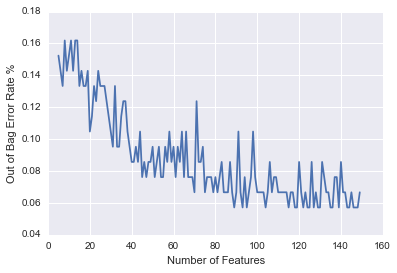

In [81]:
%matplotlib inline
sns.set_style("darkgrid")
plt.plot( percentile, per_oob_error)
plt.xlabel("Number of Features")
plt.ylabel("Out of Bag Error Rate %")
plt.show()

In [82]:
#sort by num features v oob
oob = pd.DataFrame(per_oob_error,percentile, columns=["oob"])

In [83]:
#high feature density, lowest oob
oob[oob["oob"] <.06].T

89        93        95        104       115       118       119  \
oob  0.057143  0.057143  0.057143  0.057143  0.057143  0.057143  0.057143   

          122       124       125    ...          129       130       135  \
oob  0.057143  0.057143  0.057143    ...     0.057143  0.057143  0.057143   

          136       139       143       144       146       147       148  
oob  0.057143  0.057143  0.057143  0.057143  0.057143  0.057143  0.057143  

[1 rows x 21 columns]

In [84]:
#closer to sqrt of number of features
oob[(oob["oob"] < .1)].head(10).T

31        33        34        39        40        41        42  \
oob  0.095238  0.095238  0.095238  0.095238  0.085714  0.085714  0.095238   

           43       45        46  
oob  0.085714  0.07619  0.085714

* 30 features seems optimal for balance of OOB v number of features
* 46 features and 75 features will also be run
* Sqrt of features ~14

## Prediction

In [85]:
oscars2016 = pd.read_excel('DataGathering/2016movies2.xlsx')
oscars16themes = pd.read_pickle('DataFiles/oscars16.p')
oscars2016grp = oscars2016.groupby("movietitle").mean()

PredictionOscars = oscars2016grp.join(oscars16themes).fillna(0).drop(["year","releaseyear","totalfloat","reviewagg"],1)

In [86]:
PredictionOscars

boxoffice  directorage  criticscore  audiencescore  \
movietitle                                                               
Bridge of Spies      71884220           70           91             88   
Brooklyn             30432320           46           98             90   
Mad Max: Fury Road  153629485           71           97             86   
Room                 13400000           50           96             94   
Spotlight            34765827           50           96             95   
The Big Short        60963697           48           88             89   
The Martian         227938641           79           92             92   
The Revenant        141677381           53           83             86   

                    maleper  femaleper  under18  thirtyto44  over44  ones  \
movietitle                                                                  
Bridge of Spies       71268      10966      962       29170    7754   0.5   
Brooklyn              12687       6621      278        5950    2699   1.1   
Mad Max: Fury Road   308855      47696     5163      121382   21256   1.7   
Room                  20887       8435      480        8962    2456   0.8   
Spotlight             30737       7776      483       12740    4094   0.9   
The Big Short         46718       9126      675       18600    4967   0.8   
The Martian          217607      40946     4359       87178   17734   0.6   
The Revenant         129341      23632     2547       47565    9606   0.9   

                             ...             Trailer_sentiment  \
movietitle                   ...                                 
Bridge of Spies              ...                         -0.13   
Brooklyn                     ...                          0.00   
Mad Max: Fury Road           ...                          0.19   
Room                         ...                          0.56   
Spotlight                    ...                          0.55   
The Big Short                ...                          0.05   
The Martian                  ...                         -0.04   
The Revenant                 ...                          0.11   

                    Violence_percentOfVolume  Violence_sent_count  \
movietitle                                                          
Bridge of Spies                            0                    0   
Brooklyn                                   0                    0   
Mad Max: Fury Road                         0                    0   
Room                                       0                    0   
Spotlight                                  0                    0   
The Big Short                              0                    0   
The Martian                                0                    0   
The Revenant                               0                    0   

                    Violence_sentiment  War Movie_percentOfVolume  \
movietitle                                                          
Bridge of Spies                      0                       4.98   
Brooklyn                             0                       0.00   
Mad Max: Fury Road                   0                       0.44   
Room                                 0                       0.34   
Spotlight                            0                       0.00   
The Big Short                        0                       0.31   
The Martian                          0                       0.60   
The Revenant                         0                       0.63   

                    War Movie_sent_count  War Movie_sentiment  \
movietitle                                                      
Bridge of Spies                       16                -0.28   
Brooklyn                               0                 0.00   
Mad Max: Fury Road                    17                -0.26   
Room                                   1                 0.00   
Spotlight                              0                 0.00   
The Big Sh

In [87]:
#Check to make sure columns are equivalent
for col in PredictionOscars.columns.values:
    if col in X.columns.values:
        pass
    else:
        PredictionOscars = PredictionOscars.drop(col,1)

In [88]:
clf = RandomForestClassifier(n_estimators=125, max_features =75/len(X.columns), oob_score= True, n_jobs=-1)
clf.fit(X,y)


RandomForestClassifier(bootstrap=True, compute_importances=None,
            criterion='gini', max_depth=None, max_features=0.423728813559,
            max_leaf_nodes=None, min_density=None, min_samples_leaf=1,
            min_samples_split=2, n_estimators=125, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0)

In [89]:
zip(PredictionOscars.index.values, clf.predict(PredictionOscars))

[(u'Bridge of Spies', 0),
 (u'Brooklyn', 0),
 (u'Mad Max: Fury Road', 0),
 (u'Room', 0),
 (u'Spotlight', 0),
 (u'The Big Short', 0),
 (u'The Martian', 0),
 (u'The Revenant', 1)]

## The Revenant wins!

In [93]:
clf.predict_proba(PredictionOscars)

array([[ 0.952,  0.048],
       [ 0.824,  0.176],
       [ 0.824,  0.176],
       [ 0.944,  0.056],
       [ 0.896,  0.104],
       [ 0.952,  0.048],
       [ 0.936,  0.064],
       [ 0.32 ,  0.68 ]])

In [94]:
probabilities = pd.DataFrame(clf.predict_proba(PredictionOscars), index= PredictionOscars.index.values, columns=["Nominee %", "Winner %"])

In [95]:
probabilities

Nominee %  Winner %
Bridge of Spies         0.952     0.048
Brooklyn                0.824     0.176
Mad Max: Fury Road      0.824     0.176
Room                    0.944     0.056
Spotlight               0.896     0.104
The Big Short           0.952     0.048
The Martian             0.936     0.064
The Revenant            0.320     0.680

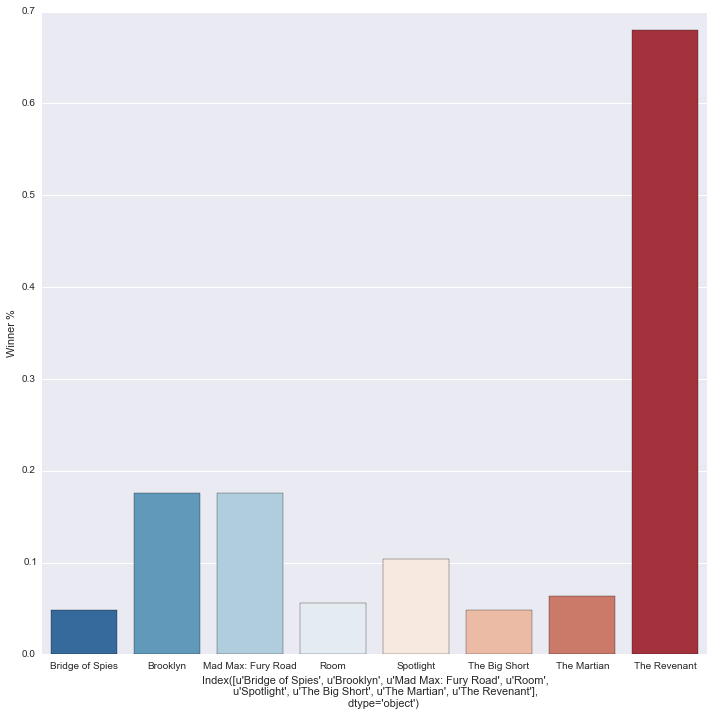

In [96]:
factorplot = sns.factorplot(x=probabilities.index, y="Winner %", data=probabilities,
                   size=10, kind="bar", palette="RdBu_r")

* Following this statistical model I wrote a [full blog post]('http://www.clarabridge.com/sotw-oscars-2016/') exmaining support found in the data


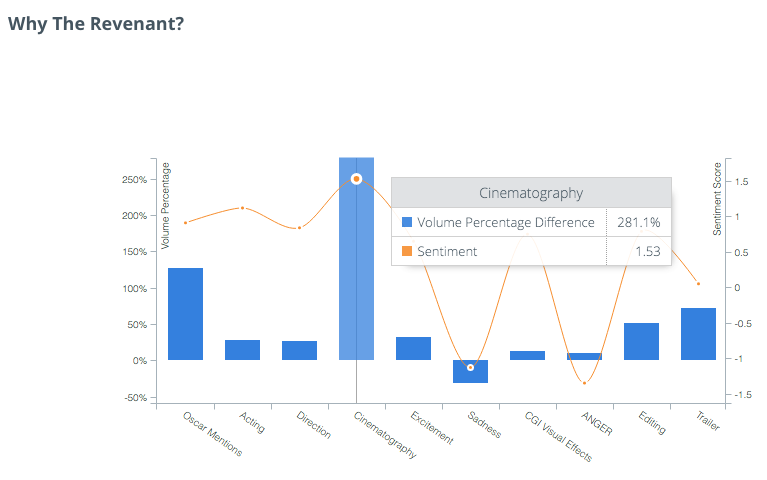

In [98]:
display(Image('/Users/dheepan.ramanan/Documents/OscarsData/Screenshots/capture6.png'))